#Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [7]:
fraud= pd.read_csv("Fraud_check.csv")

In [8]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [12]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [13]:
fraud= fraud.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_experience'})

In [14]:
fraud.head()

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [15]:
fraud.columns

Index(['Undergrad', 'marital_status', 'taxable_income', 'city_population',
       'work_experience', 'Urban'],
      dtype='object')

In [16]:
fraud['marital_status'].value_counts()

Single      217
Married     194
Divorced    189
Name: marital_status, dtype: int64

In [17]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [18]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [19]:
fraud1=fraud.copy()
list=[]
for i in range(0,len(fraud)):
  if fraud["taxable_income"][i]<=30000:
    list.append("Risky")
  elif fraud["taxable_income"][i]>30000:
    list.append("Good")
fraud1["loan_type"]=list
fraud1

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [20]:
fraud1.loan_type.value_counts()

Good     476
Risky    124
Name: loan_type, dtype: int64

In [21]:
categorical_feature=[feature for feature in fraud1.columns if fraud1[feature].dtype=="O"]
categorical_feature

['Undergrad', 'marital_status', 'Urban', 'loan_type']

In [22]:
numerical_feature=[feature for feature in fraud1.columns if fraud1[feature].dtype!="O"]
numerical_feature

['taxable_income', 'city_population', 'work_experience']

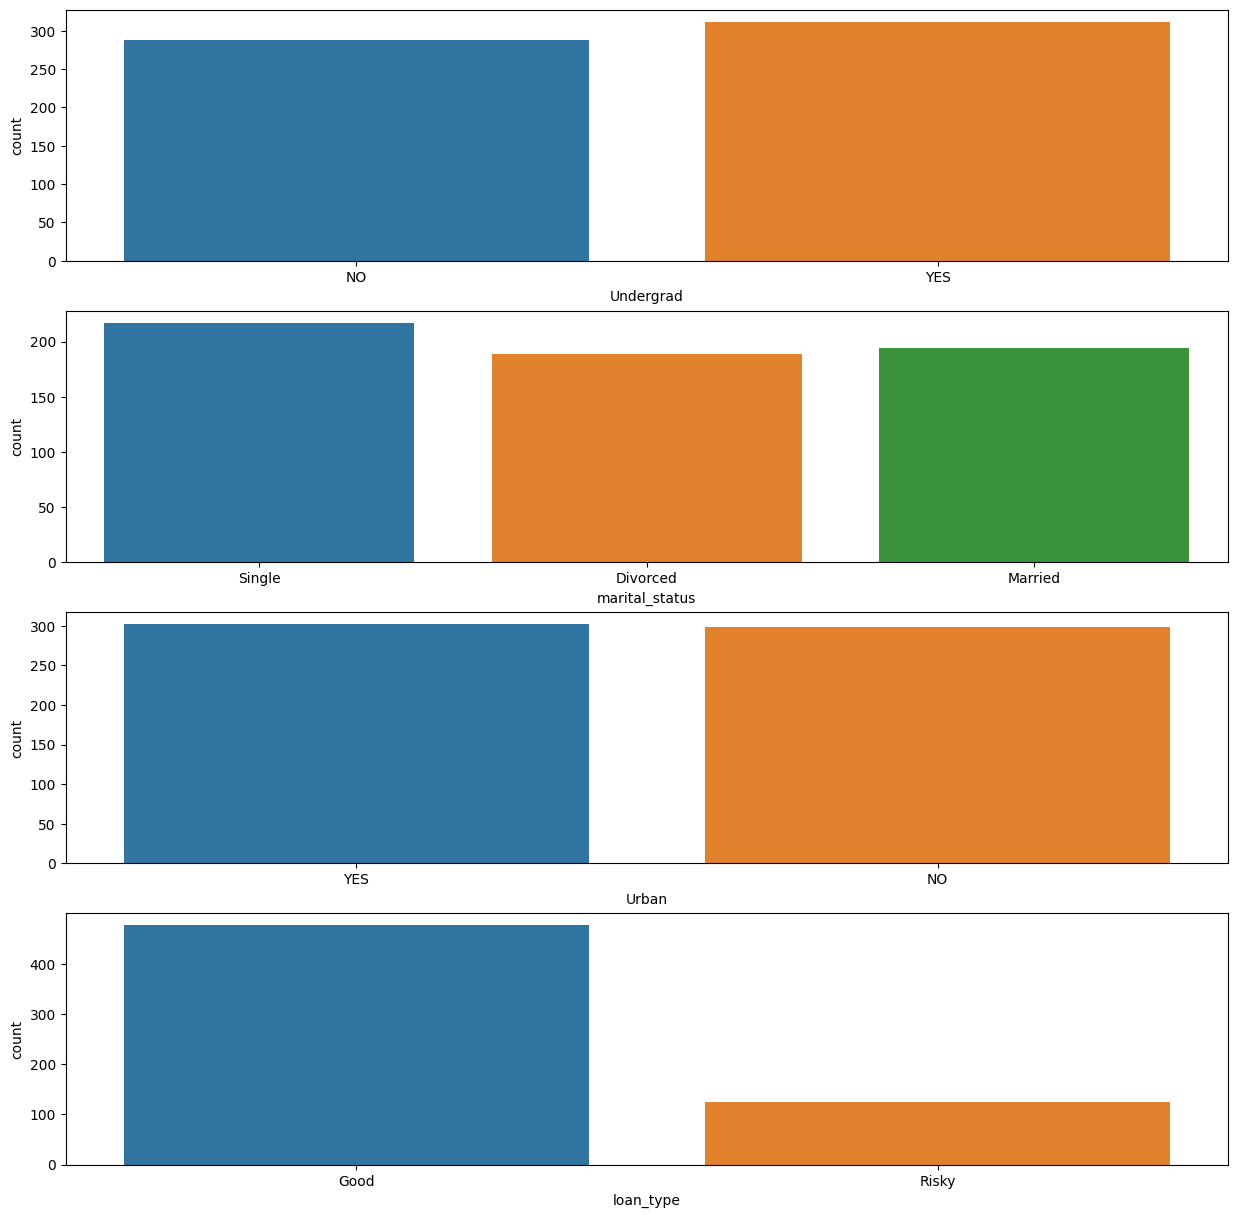

In [23]:
fig,ax=plt.subplots(len(categorical_feature),1,figsize=(15,15))
for i in range (0, len(categorical_feature)):
    sns.countplot(x=categorical_feature[i],ax=ax[i],data=fraud1)

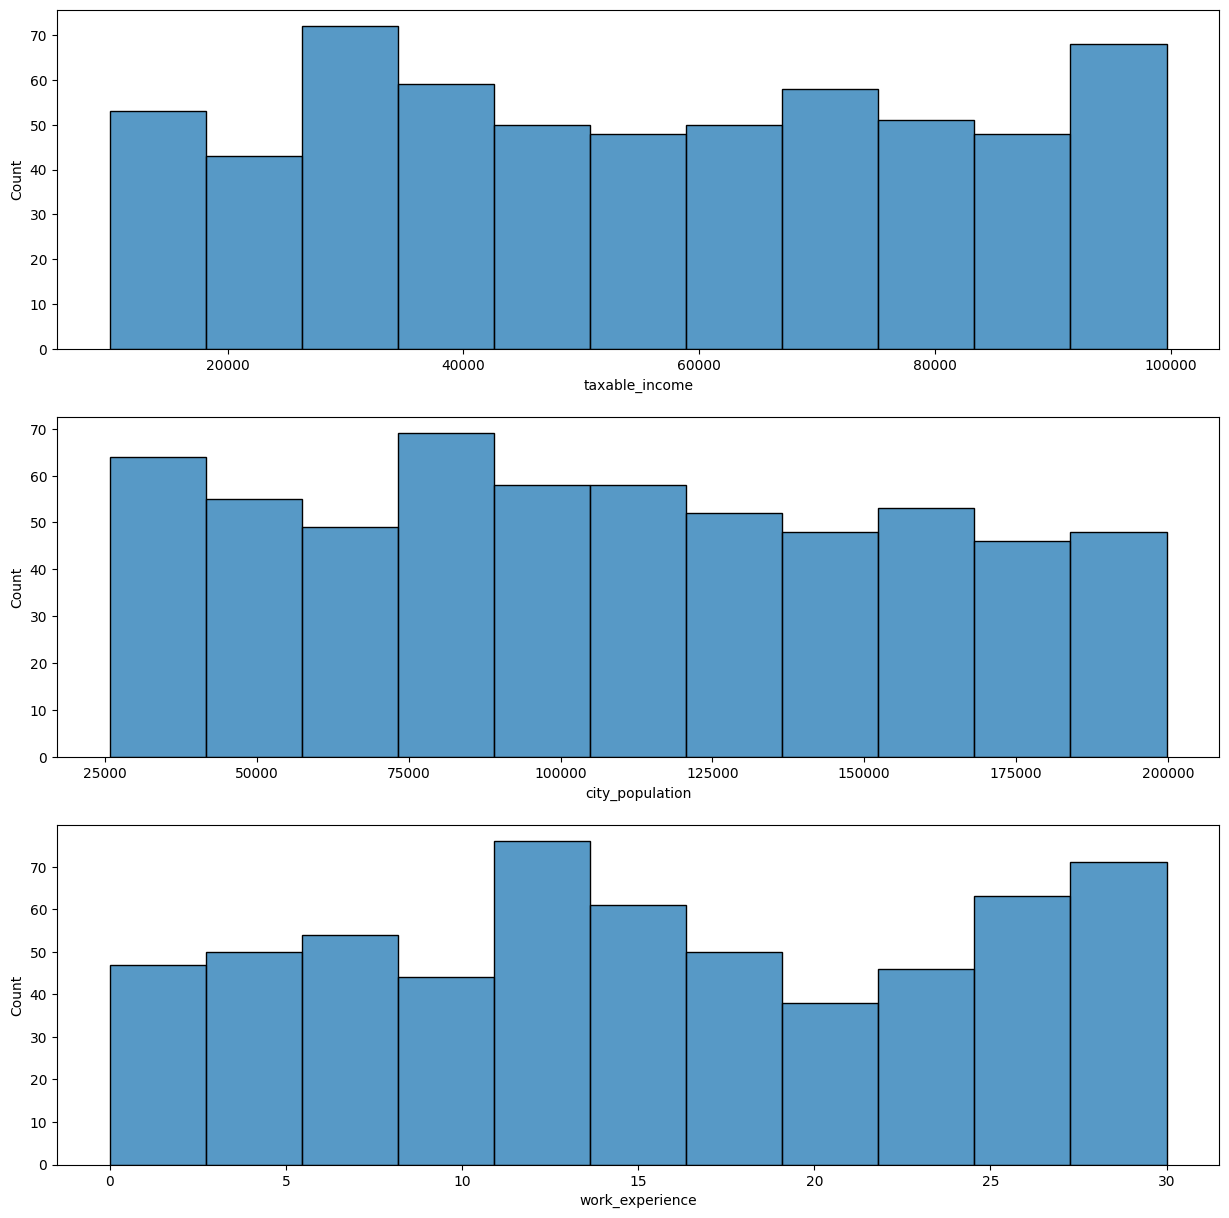

In [24]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(15,15))
for i in range(0,len(numerical_feature)):
  sns.histplot(x=numerical_feature[i],ax=ax[i],data=fraud1)

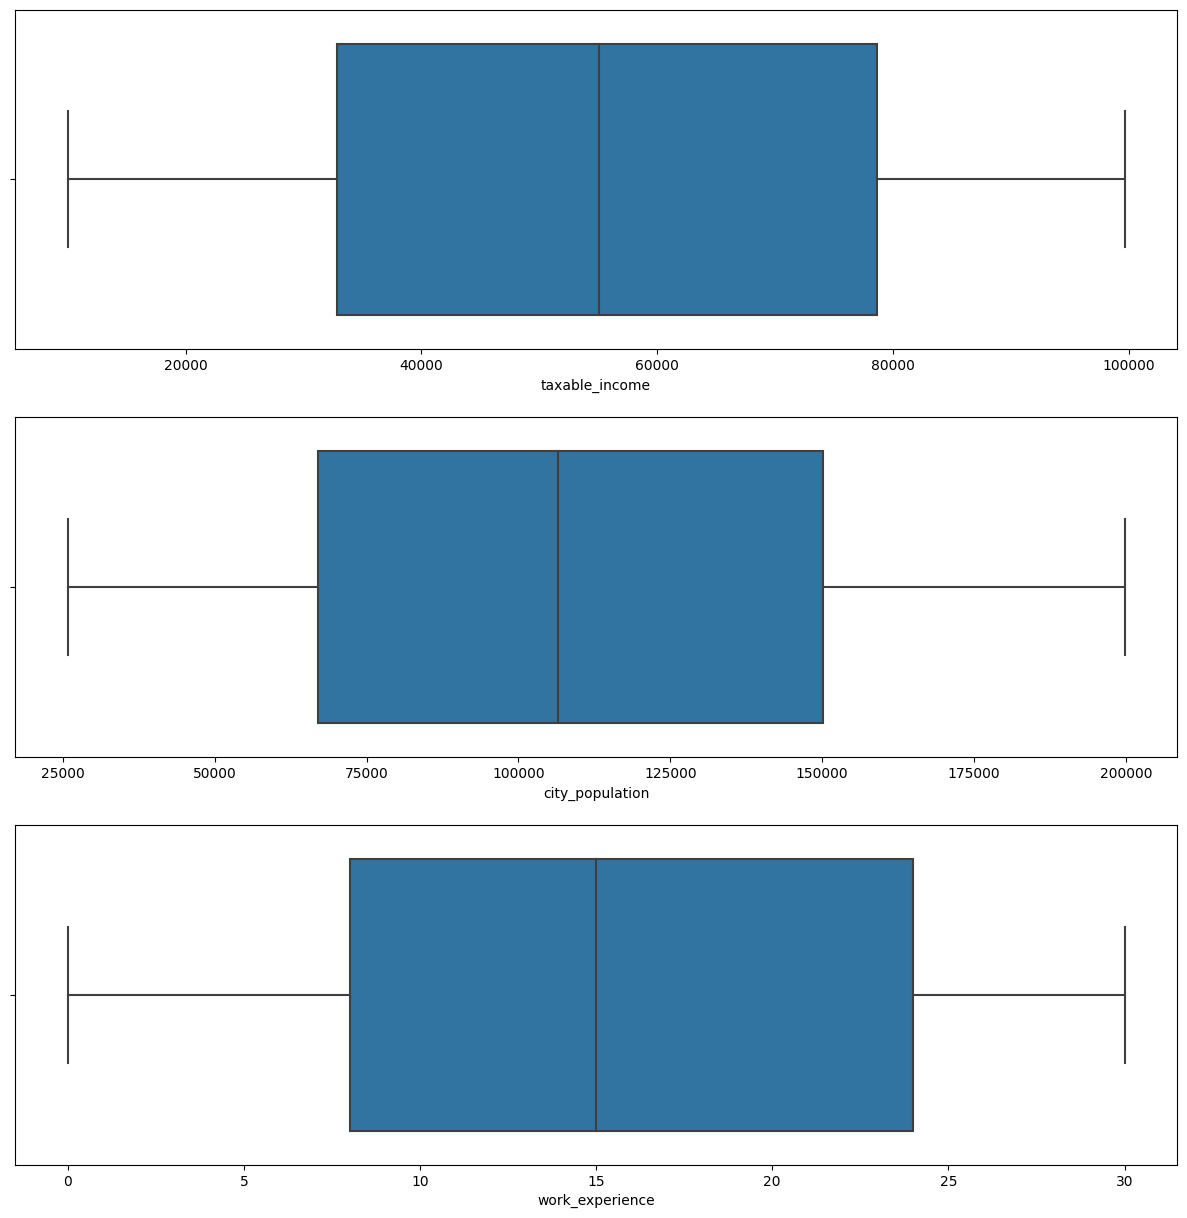

In [25]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(15,15))
for i in range(0,len(numerical_feature)):
  sns.boxplot(x=numerical_feature[i],ax=ax[i],data=fraud1)

univarient analysis

In [26]:
loan_asset_risky = pd.DataFrame()
loan_asset_good = pd.DataFrame
loan_asset_risky = fraud1.loc[fraud1["loan_type"]=='Risky']
loan_asset_good = fraud1.loc[fraud1["loan_type"]=='Good']

In [27]:
loan_asset_risky

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
10,NO,Single,29732,102602,19,YES,Risky
12,NO,Divorced,11794,148033,14,YES,Risky
16,YES,Divorced,24987,34551,29,NO,Risky
19,NO,Single,10987,126953,30,YES,Risky
21,YES,Divorced,14310,29106,7,YES,Risky
...,...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES,Risky
557,YES,Married,12810,157421,10,NO,Risky
567,YES,Single,16316,129912,30,NO,Risky
575,NO,Divorced,10735,95975,13,YES,Risky


In [28]:
loan_asset_good

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [29]:
fraud1.drop(["taxable_income"],inplace=True,axis=1)

In [30]:
fraud1

,Undergrad,marital_status,city_population,work_experience,Urban,loan_type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


taxable income w.r.t fraud

KeyError: ignored

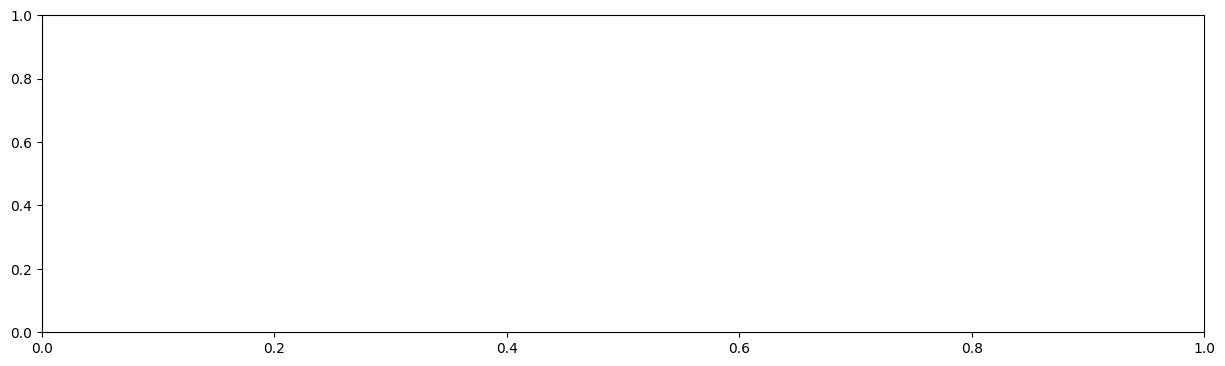

In [31]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['taxable_income'], bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
plt.title('Taxable.Income of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['taxable_income'],  bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
plt.title('taxable_income of those with no risk',)



income_describe = pd.DataFrame()

income_describe['Taxable.Income of those with high risk'] = loan_asset_risky['taxable_income'].describe()
income_describe['Taxable.Income of those with no risk'] = loan_asset_good['taxable_income'].describe()
income_describe  = income_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show()

work_experiencew.r.t fraud

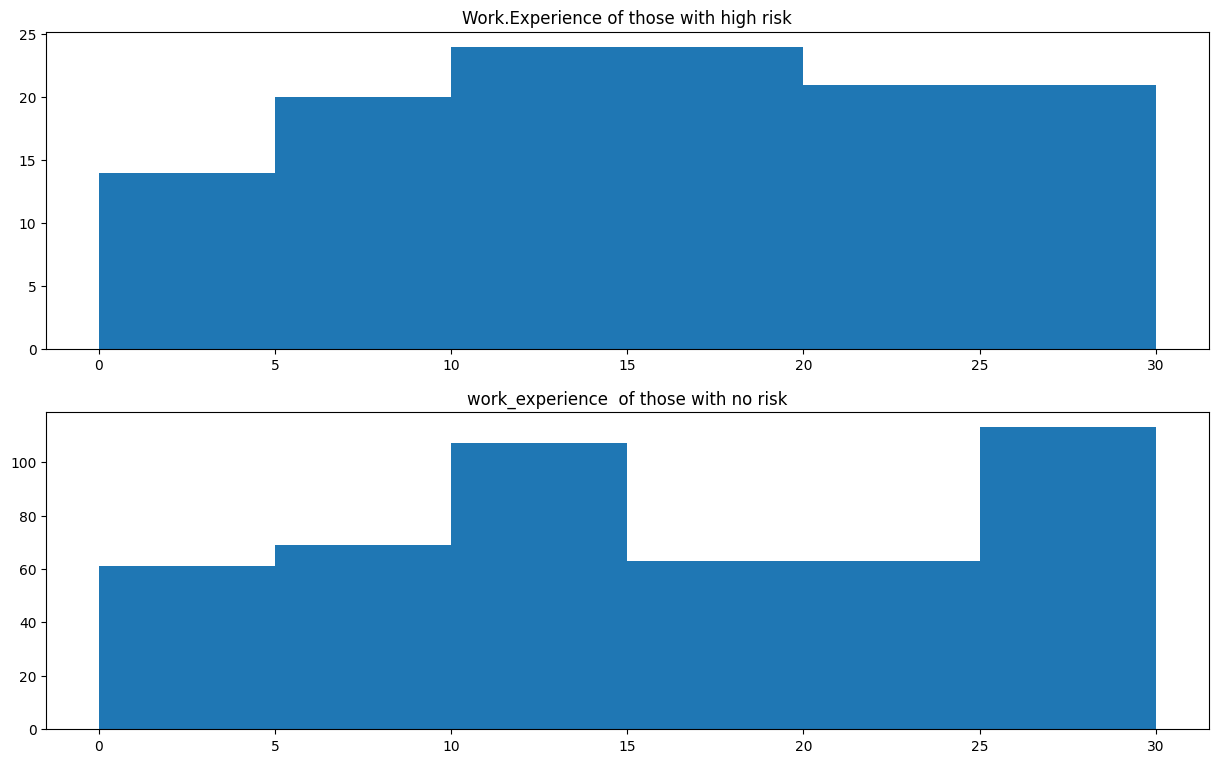

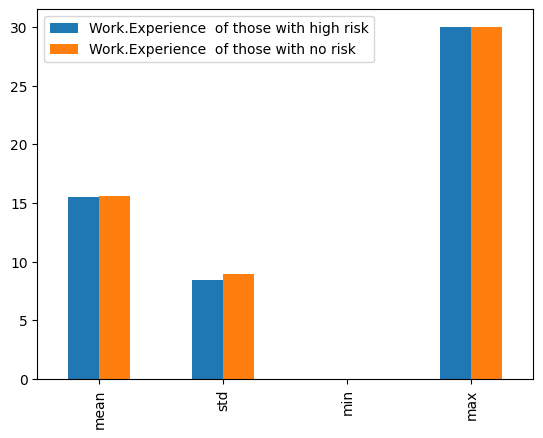

In [32]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['work_experience'], bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.title('Work.Experience of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['work_experience'],  bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.title('work_experience  of those with no risk',)



exp_describe = pd.DataFrame()

exp_describe['Work.Experience  of those with high risk'] = loan_asset_risky['work_experience'].describe()
exp_describe['Work.Experience  of those with no risk'] = loan_asset_good['work_experience'].describe()
exp_describe = exp_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
exp_describe.plot.bar()

plt.show()

undergrade w.r.t fraud

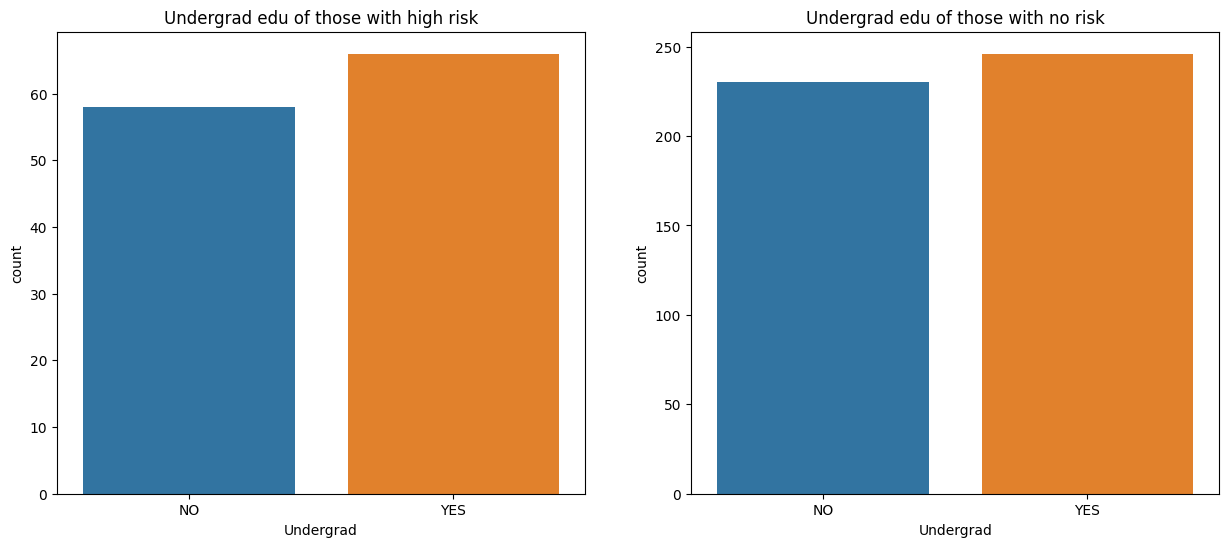

In [33]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=loan_asset_risky,x='Undergrad')
plt.title('Undergrad edu of those with high risk')

plt.subplot(1,2,2)
sns.countplot(data=loan_asset_good,x='Undergrad')
plt.title('Undergrad edu of those with no risk')

plt.show()

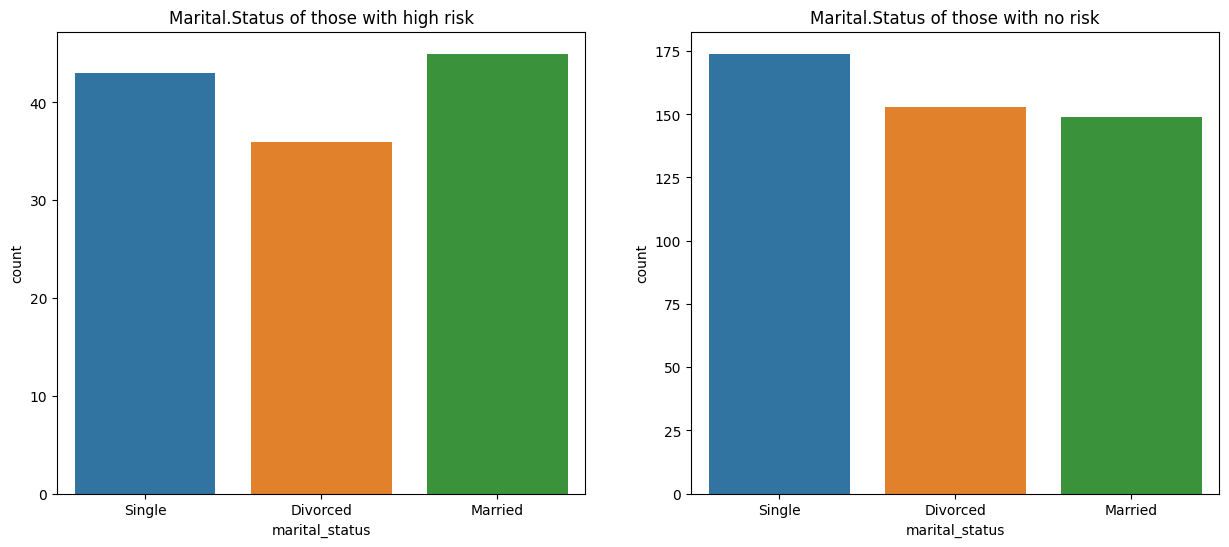

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="marital_status",data=loan_asset_risky)
plt.title('Marital.Status of those with high risk')

plt.subplot(1,2,2)
sns.countplot(x='marital_status',data=loan_asset_good)
plt.title('Marital.Status of those with no risk',)

plt.show()

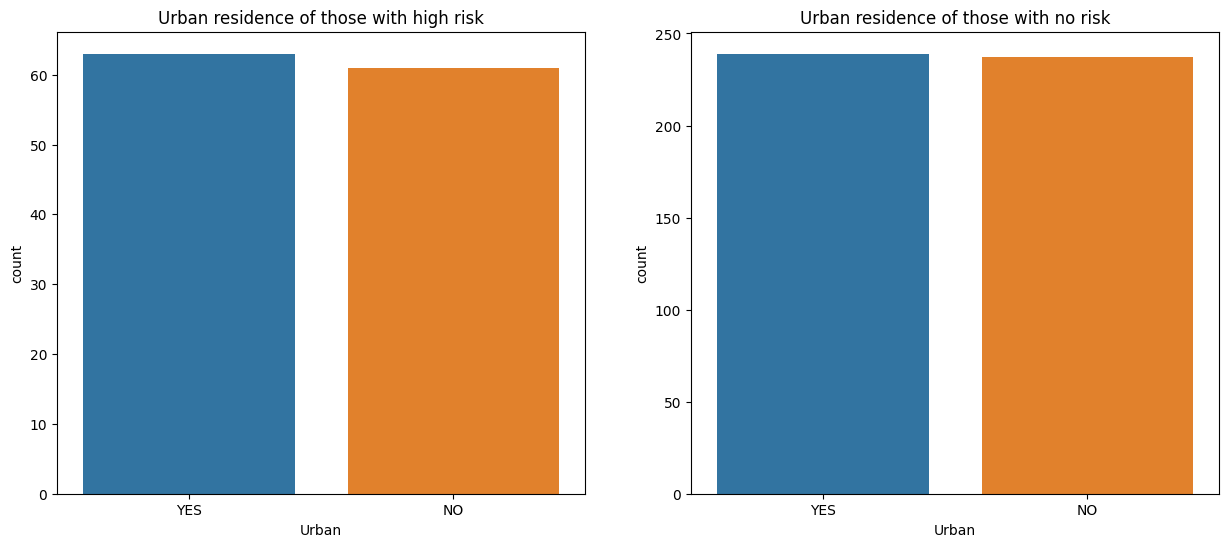

In [35]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(data=loan_asset_risky,x='Urban')
plt.title('Urban residence of those with high risk')

plt.subplot(1,2,2)
sns.countplot(data=loan_asset_good,x='Urban')
plt.title('Urban residence of those with no risk',)

plt.show()

data preprocessing

In [36]:
x= fraud1.iloc[:,:-1]
y=fraud1.iloc[:,-1]

In [37]:
x.head()

,Undergrad,marital_status,city_population,work_experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


In [38]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: loan_type, dtype: object

In [39]:
x= pd.get_dummies(x)

In [40]:
x.head()

,city_population,work_experience,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [41]:
encoder = LabelEncoder()
y=encoder.fit_transform(y)

In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.3)

In [44]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(420, 9) (180, 9) (420,) (180,)


In [45]:
#Bagged Decision trees for classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
cart=DecisionTreeClassifier()
num_tree=100

model=BaggingClassifier(estimator=cart,n_estimators=num_tree,random_state=7)
result=cross_val_score(model,x,y,cv=kfold)

In [47]:
print(result.mean())

0.745


In [48]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
kfold=KFold(n_splits=10,random_state=10,shuffle=True)
num_tree=100
max_feature=5
model=RandomForestClassifier(n_estimators=num_tree,max_features=max_feature)
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.735


hyper parameter tuning

In [49]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = {
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]
}

rf = RandomForestClassifier()

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [50]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 10}
0.7933333333333332


In [51]:
model_kf =grid.best_estimator_
model_kf.fit(x, y)

results = cross_val_score(model_kf, x, y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))

Accuracy with k fold validation 0.793


In [52]:
#ada boost classification
from sklearn.ensemble import AdaBoostClassifier
kfold=KFold(n_splits=5,random_state=7,shuffle=True)
model=AdaBoostClassifier(n_estimators=100,random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7616666666666666


#2

#Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [58]:
company= pd.read_csv("Company_Data (1).csv")

In [59]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [60]:
company.shape

(400, 11)

In [61]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [62]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [63]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [64]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [65]:
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [66]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

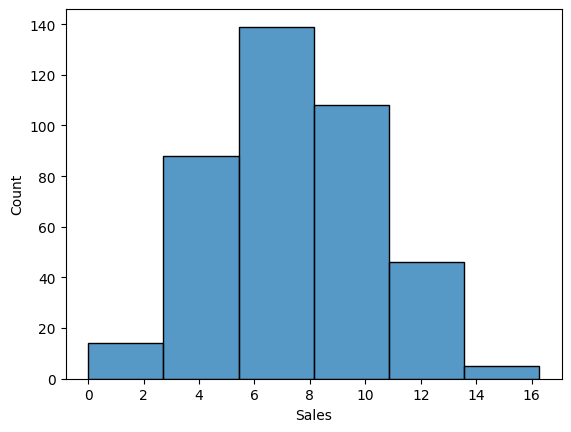

In [67]:
sns.histplot(company["Sales"], bins=6)

In [68]:
company.Sales.max()

16.27

In [69]:
company.Sales.min()

0.0

In [70]:
company.Sales.max()/3

5.423333333333333

In [71]:
company1=company.copy()
company1["sub_category"]=pd.cut(x=company1.Sales,bins=[0,5.5,11,17],labels=["low","medium","high"],right=False)

In [72]:
company1.drop(["Sales"],inplace=True,axis=1)
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sub_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,139,23,3,37,120,Medium,55,11,No,Yes,medium
397,162,26,12,368,159,Medium,40,18,Yes,Yes,medium
398,100,79,7,284,95,Bad,50,12,Yes,Yes,medium


In [73]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CompPrice     400 non-null    int64   
 1   Income        400 non-null    int64   
 2   Advertising   400 non-null    int64   
 3   Population    400 non-null    int64   
 4   Price         400 non-null    int64   
 5   ShelveLoc     400 non-null    object  
 6   Age           400 non-null    int64   
 7   Education     400 non-null    int64   
 8   Urban         400 non-null    object  
 9   US            400 non-null    object  
 10  sub_category  400 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [74]:
company1["sub_category"]=company1.sub_category.astype(str)

In [75]:
categorical_feature=[feature for feature in company1.columns if company1[feature].dtype=="O"]
categorical_feature

['ShelveLoc', 'Urban', 'US', 'sub_category']

In [76]:
numerical_feature=[feature for feature in company1.columns if company1[feature].dtype!="O"]
numerical_feature

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

In [77]:
company1.sub_category.value_counts()


medium    248
low       103
high       49
Name: sub_category, dtype: int64

Visualization

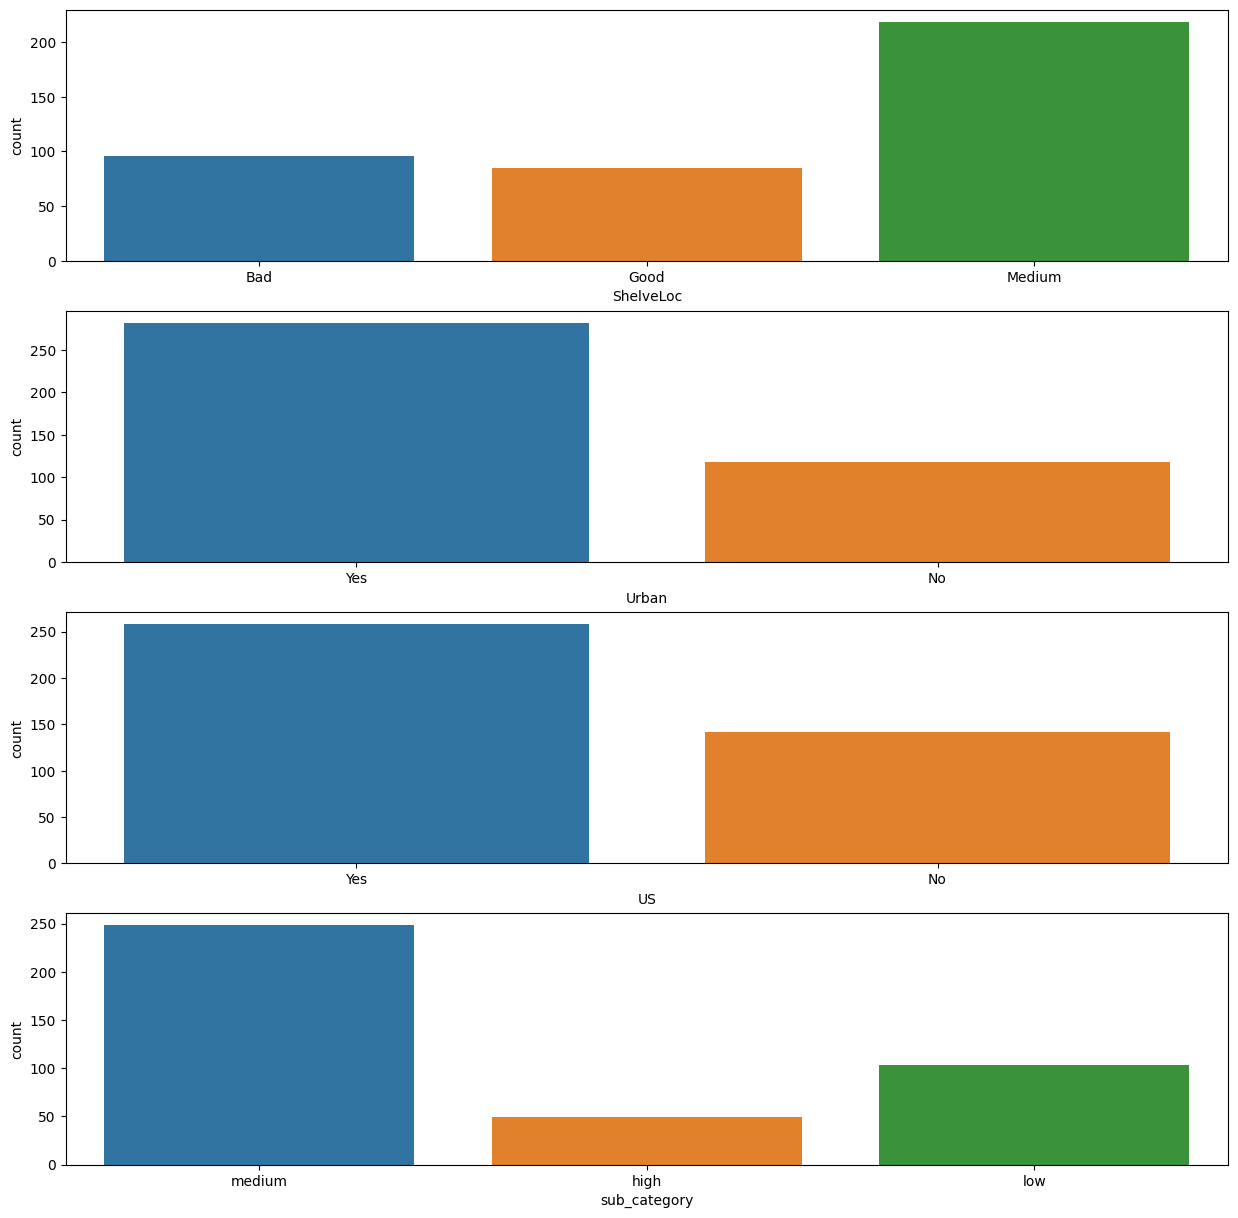

In [79]:
fig,ax=plt.subplots(len(categorical_feature),1,figsize=(15,15))

for i in range(0,len(categorical_feature)):
  sns.countplot(x=categorical_feature[i], ax=ax[i], data=company1)

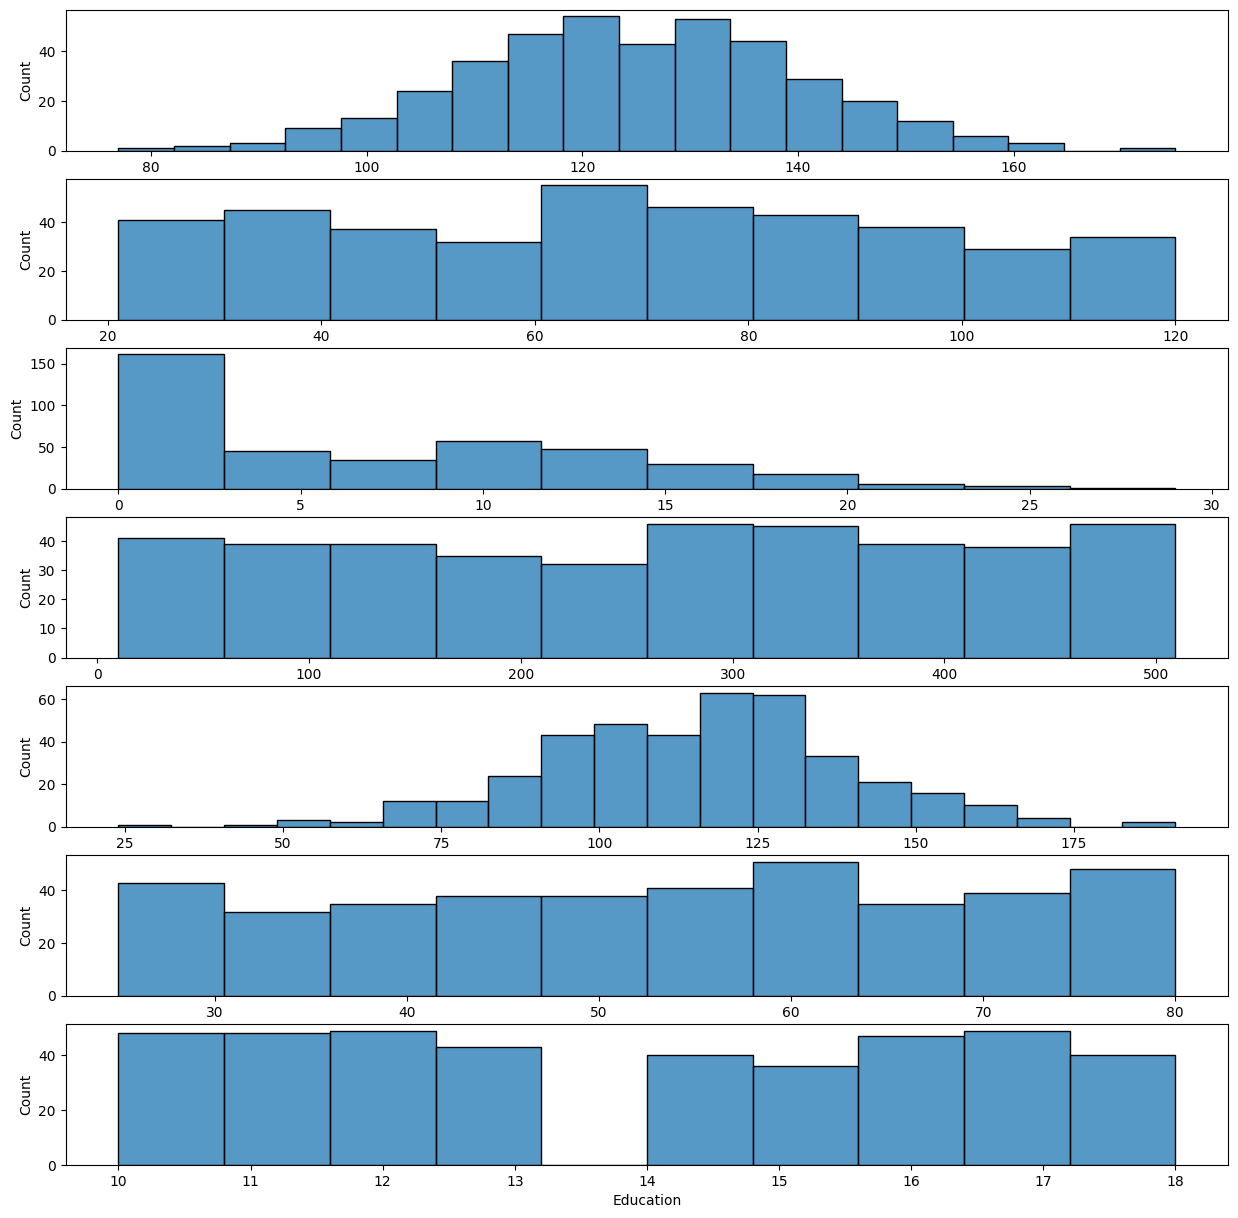

In [80]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(15,15))

for i in range(0,len(numerical_feature)):
  sns.histplot(x=numerical_feature[i],ax=ax[i],data=company1)

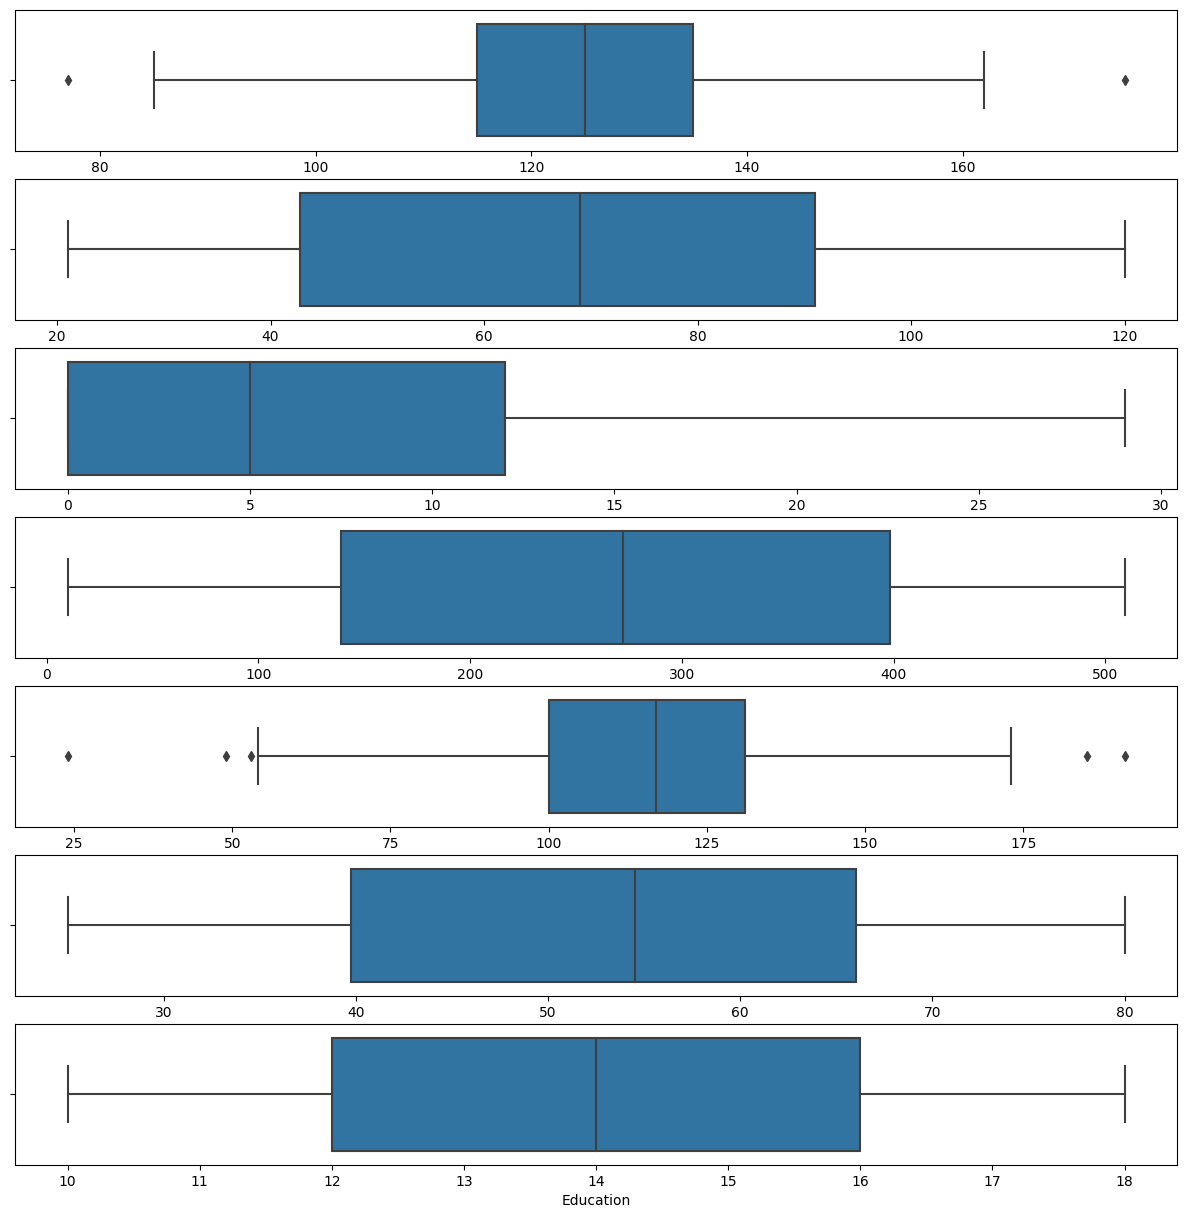

In [81]:
fig,ax=plt.subplots(len(numerical_feature),1,figsize=(15,15))

for i in range(0,len(numerical_feature)):
  sns.boxplot(x=numerical_feature[i],ax=ax[i],data=company1)

In [82]:
company2 = company1.copy()

for feature in numerical_feature:
    Q1,Q3 = np.percentile(company1[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = company1[feature][(company1[feature] < ll) |  (company1[feature] > ul)]

    company2=company2.drop(outliers.index[:] , errors="ignore")

    outliers=0

In [83]:
print(company.shape)
print(company2.shape)

(400, 11)
(394, 11)


Data preprocessing

In [84]:
x=company2.drop(["sub_category"],axis=1)
y=company2["sub_category"]

In [85]:
print(x)
print(y)

     CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3          

In [86]:
x=pd.get_dummies(x)

In [87]:
encoder=LabelEncoder()
encoder.fit_transform(y)

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0,

Feature selection

In [88]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [89]:
test=SelectKBest(score_func=chi2, k=4)
fit= test.fit(x,y)

In [90]:
scores = fit.scores_
features = fit.transform(x)

In [92]:
score_df = pd.DataFrame(zip(scores, x.columns),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
4,208.054983,Price
2,136.853810,Advertising
5,98.820931,Age
8,73.257684,ShelveLoc_Good
1,52.351760,Income
7,47.776587,ShelveLoc_Bad
3,27.657789,Population
9,13.260983,ShelveLoc_Medium
12,7.245057,US_No
0,5.019311,CompPrice


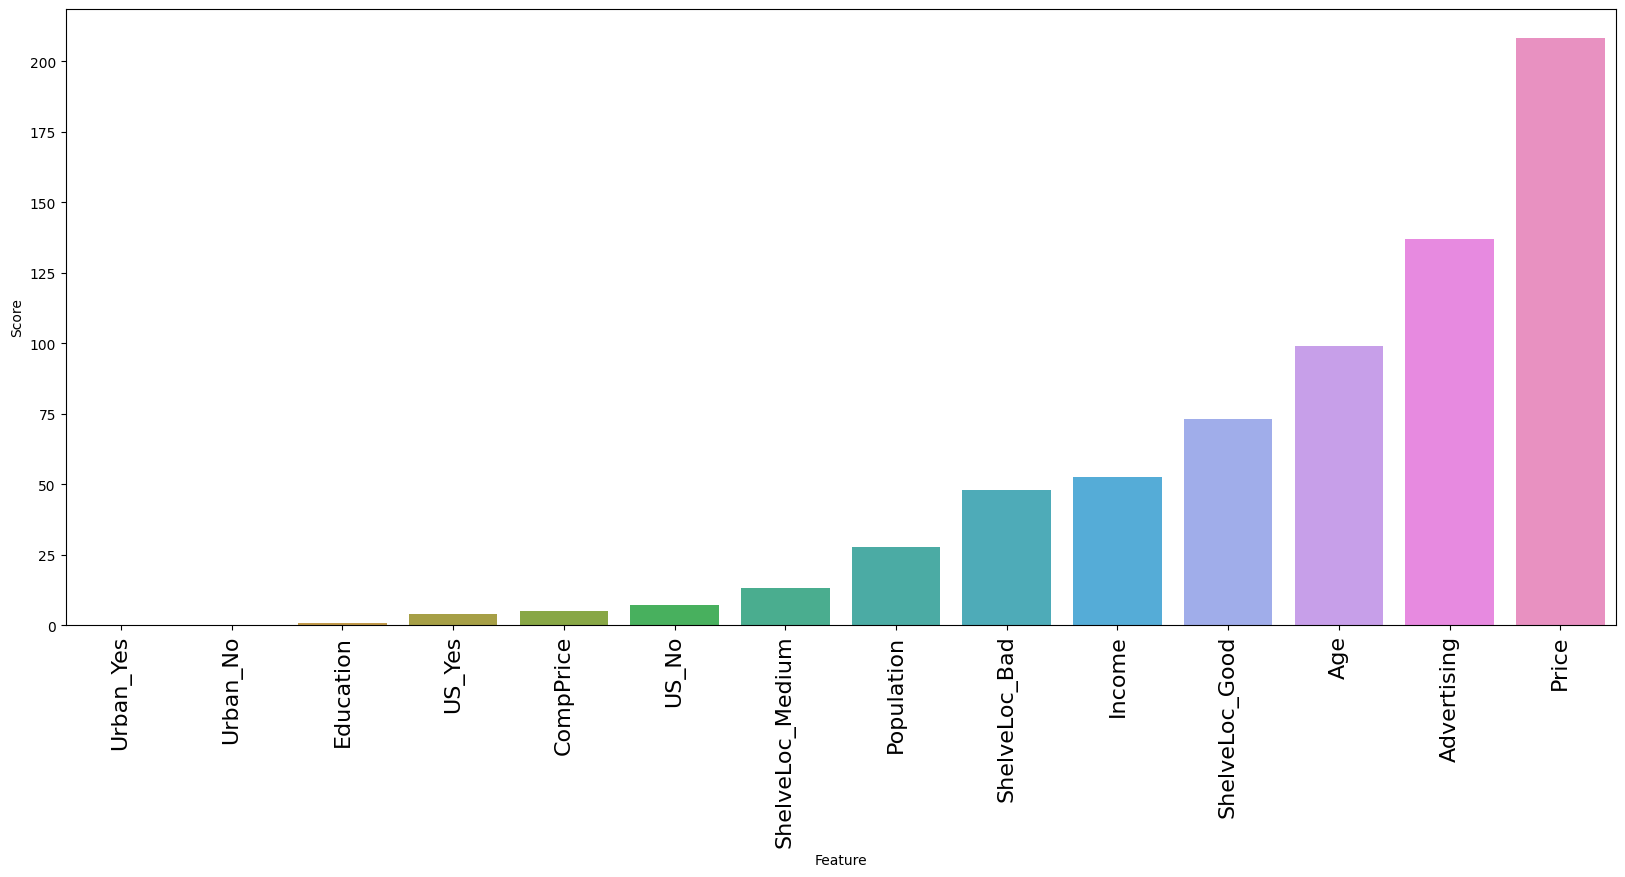

In [93]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xticks(rotation = 90, fontsize = 16)
plt.show()

In [94]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

In [95]:
model_data_x

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141
...,...,...,...,...,...,...,...,...,...,...
395,128,17,203,108,33,1,0,0,0,138
396,120,3,37,23,55,0,0,1,0,139
397,159,12,368,26,40,0,0,1,0,162
398,95,7,284,79,50,0,1,0,0,100


In [96]:
model_data_y=y
model_data_y

0      medium
1        high
2      medium
3      medium
4         low
        ...  
395      high
396    medium
397    medium
398    medium
399    medium
Name: sub_category, Length: 394, dtype: object

In [97]:
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

Model Building

In [98]:
#Baggged decision tree for classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [99]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)
cart=DecisionTreeClassifier()
num_tree=100

model=BaggingClassifier(estimator=cart,n_estimators=num_tree,random_state=7)
result=cross_val_score(model,model_data_x,model_data_y,cv=kfold)

In [100]:
print(result.mean())

0.7486538461538461


In [101]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
kfold=KFold(n_splits=10,random_state=10,shuffle=True)
num_tree=100
max_feature=5
model=RandomForestClassifier(n_estimators=num_tree,max_features=max_feature)
result=cross_val_score(model,model_data_x,model_data_y,cv=kfold)
print(result.mean())

0.7337179487179487


Using grid search hyper parameter tuning

In [102]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = {
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(model_data_x, model_data_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [103]:
print(grid.best_score_)
print(grid.best_params_)

0.7335897435897436
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 25}


In [104]:
model_kf =grid.best_estimator_
model_kf.fit(model_data_x, model_data_y)

results = cross_val_score(model_kf, model_data_x, model_data_y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))

Accuracy with k fold validation 0.734


In [105]:
#ada boost classification
from sklearn.ensemble import AdaBoostClassifier
kfold=KFold(n_splits=5,random_state=7,shuffle=True)
model=AdaBoostClassifier(n_estimators=100,random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7563777994157741
